In [177]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

# Carga de los dataframe

In [178]:
#nivel educativo
postulantes_educacion = pd.read_csv("datos/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv", low_memory=False)

#fecha de nacimiento y genero
postulantes_genero_y_edad = pd.read_csv("datos/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv", low_memory=False)

#vistas de avisos online y offline
vistas = pd.read_csv("datos/datos_navent_fiuba/fiuba_3_vistas.csv", low_memory=False)

#postulaciones hasta el 1ro de marzo 2018
postulaciones = pd.read_csv("datos/datos_navent_fiuba/fiuba_4_postulaciones.csv", low_memory=False)

#avisos online al 8 de marzo de 2018
avisos_online = pd.read_csv("datos/datos_navent_fiuba/fiuba_5_avisos_online.csv", low_memory=False)

#detalle de avisos vistos y postulados tanto offline como online
avisos_detalle = pd.read_csv("datos/datos_navent_fiuba/fiuba_6_avisos_detalle.csv", low_memory=False)

# Columnas

In [179]:
postulantes_educacion.rename(columns = {'nombre':'nivel'}, inplace = True)

postulantes_educacion.columns

Index(['idpostulante', 'nivel', 'estado'], dtype='object')

In [180]:
postulantes_genero_y_edad.columns

Index(['idpostulante', 'fechanacimiento', 'sexo'], dtype='object')

In [181]:
vistas.rename(columns = {'nombre':'Nivel'}, inplace = True)
vistas.rename(columns = {'timestamp':'FechaVista'}, inplace = True)
vistas.rename(columns = {'idAviso':'idaviso'}, inplace = True)
vistas.columns

Index(['idaviso', 'FechaVista', 'idpostulante'], dtype='object')

In [182]:
postulaciones.columns

Index(['idaviso', 'idpostulante', 'fechapostulacion'], dtype='object')

In [183]:
avisos_online.columns

Index(['idaviso'], dtype='object')

In [184]:
avisos_detalle.columns

Index(['idaviso', 'idpais', 'titulo', 'descripcion', 'nombre_zona', 'ciudad',
       'mapacalle', 'tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa'],
      dtype='object')

# informacion de columnas

In [185]:
postulantes_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nivel           298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 6.8+ MB


In [186]:
postulantes_genero_y_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [187]:
vistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idaviso         961897 non-null int64
FechaVista      961897 non-null object
idpostulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 22.0+ MB


In [188]:
postulaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso             int64
idpostulante        object
fechapostulacion    object
dtypes: int64(1), object(2)
memory usage: 77.9+ MB


In [189]:
avisos_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 1 columns):
idaviso    5028 non-null int64
dtypes: int64(1)
memory usage: 39.4 KB


In [190]:
avisos_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


#  dataframe

In [191]:
postulantes_educacion.head()

,idpostulante,nivel,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [192]:
postulantes_genero_y_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [193]:
vistas.head()

,idaviso,FechaVista,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [194]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [195]:
avisos_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [196]:
avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


# tamanio de los dataframe

In [197]:

print("Postulantes Educacion: " + str(postulantes_educacion.shape))

print("Postulantes Genero y Edad: " + str(postulantes_genero_y_edad.shape))

print("Vistas: " + str(vistas.shape))

print("Postulaciones: " + str(postulaciones.shape))

print("Avisos Online: " + str(avisos_online.shape))

print("Avisos Detalle: " + str(avisos_detalle.shape))

Postulantes Educacion: (298231, 3)
Postulantes Genero y Edad: (200888, 3)
Vistas: (961897, 3)
Postulaciones: (3401623, 3)
Avisos Online: (5028, 1)
Avisos Detalle: (13534, 11)


# Cantidad por valores de columna

In [198]:
postulantes_educacion['nivel'].value_counts()
#postulantes_genero_y_edad['anioNacimiento'] = postulantes_genero_y_edad['fechanacimiento'].apply(lambda x: x.split('-')[0])


Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: nivel, dtype: int64

In [199]:
postulantes_educacion['estado'].value_counts()
#postulantes_genero_y_edad['anioNacimiento'] = po

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

In [200]:
#le sumo la xolumna edad por q viene la fecha de nacimiento y no la edad especifica
postulantes_genero_y_edad['edad'] =  2018 - postulantes_genero_y_edad[postulantes_genero_y_edad['fechanacimiento'].notnull()]['fechanacimiento'].apply(lambda x: x.split('-')[0]).apply(np.int64)
#aca no me dejaba convertir la col edad de float a int por los nan's asii q converti los nana a 0 y conveti toda la col en int
postulantes_genero_y_edad['edad'] = postulantes_genero_y_edad['edad'].fillna(0.0).apply(np.int64)
postulantes_genero_y_edad['edad']
#saque los valores ridiculos
edades = postulantes_genero_y_edad[(postulantes_genero_y_edad['edad'] > 17) & (postulantes_genero_y_edad['edad'] < 100)]['edad'].value_counts().sort_index(ascending=False)


<IPython.core.display.Javascript object>


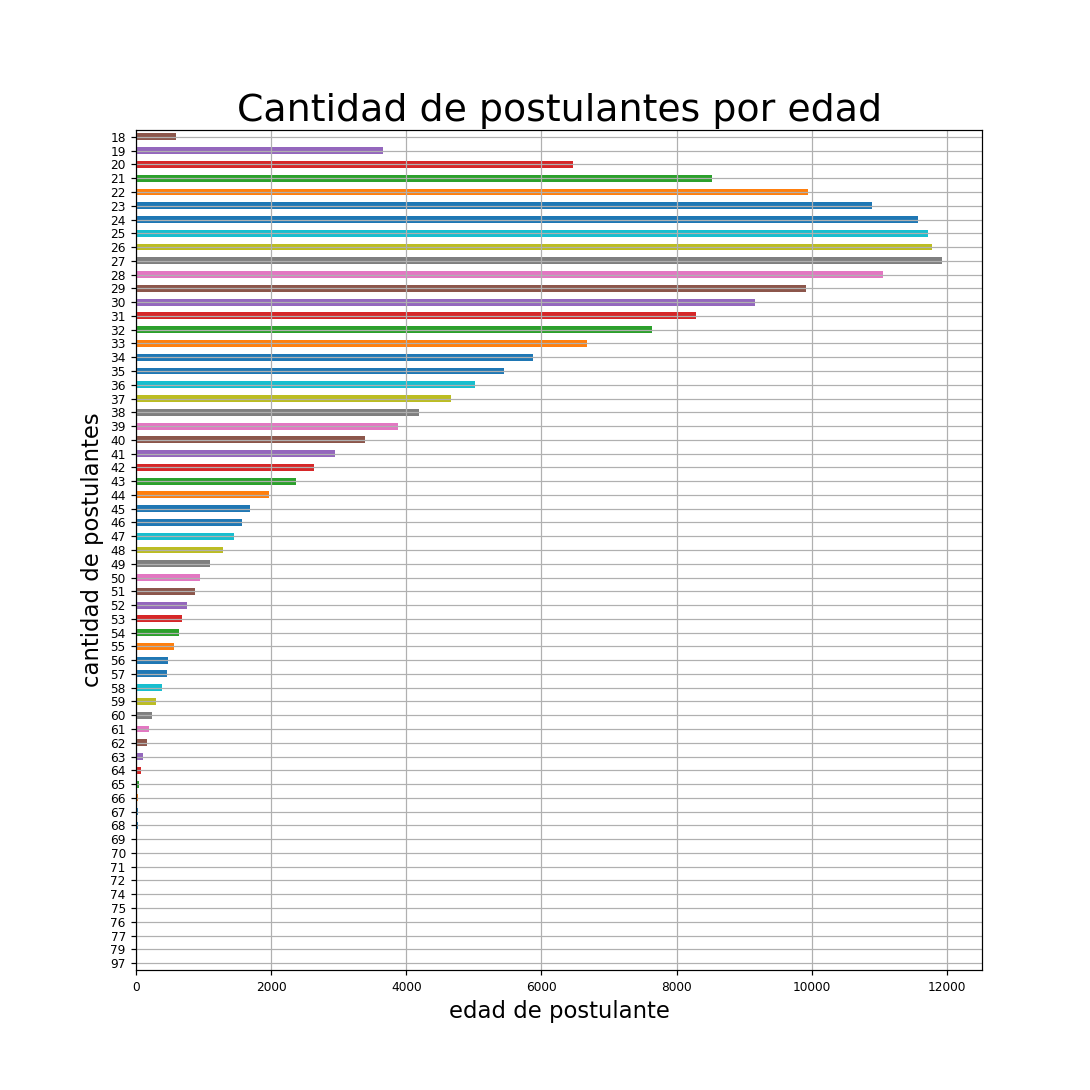

Text(0.5,1,'Cantidad de postulantes por edad')

In [218]:
%matplotlib notebook
edades.plot(kind='barh',figsize=(10,10),rot=0,fontsize= 8,grid = True);
ax=plt.gca()
ax.set_ylabel('cantidad de postulantes',fontsize=15);
ax.set_xlabel('edad de postulante',fontsize=15)
ax.set_title('Cantidad de postulantes por edad',fontsize=25)

<IPython.core.display.Javascript object>


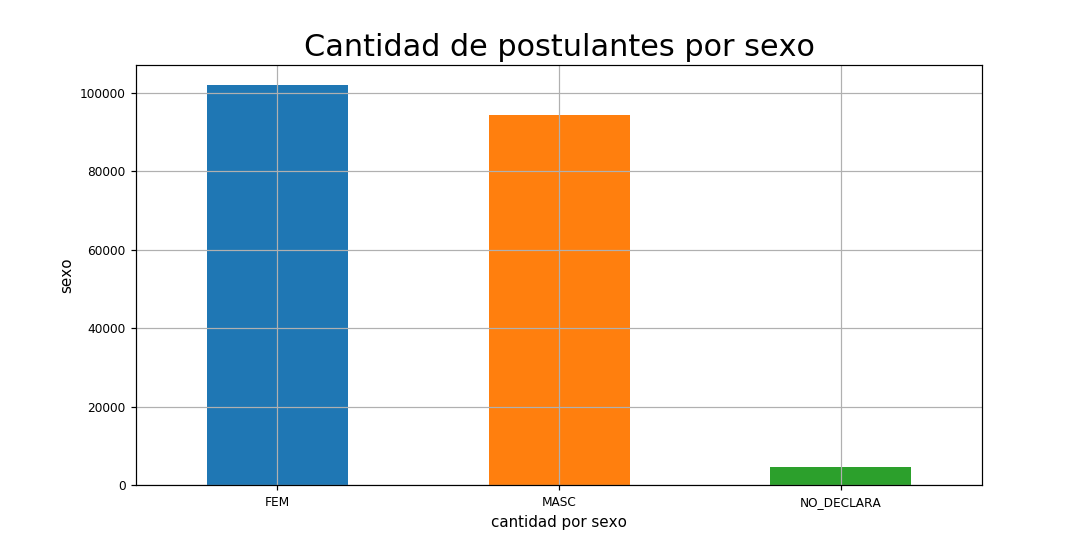

Text(0.5,1,'Cantidad de postulantes por sexo')

In [219]:
%matplotlib notebook


postulantes_genero_y_edad['sexo'].value_counts().plot(kind='bar',figsize=(10,5),rot=0,fontsize= 8,grid = True);
ax=plt.gca()
ax.set_ylabel('sexo',fontsize=10);
ax.set_xlabel('cantidad por sexo',fontsize=10)
ax.set_title('Cantidad de postulantes por sexo',fontsize=20)


In [203]:
postulantes_genero_y_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 4 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
edad               200888 non-null int64
dtypes: int64(1), object(3)
memory usage: 6.1+ MB


In [204]:

postulantes_genero_y_edad['het_map'] = 1
for_hetmap = postulantes_genero_y_edad[((postulantes_genero_y_edad['sexo']=='FEM') | (postulantes_genero_y_edad['sexo']=='MASC'))& (postulantes_genero_y_edad['edad']<100)]
for_hetmap = for_hetmap.pivot_table(index='sexo', columns='edad', values='het_map', aggfunc='sum')
for_hetmap

edad,0,12,18,19,20,21,22,23,24,25,...,69,70,71,72,74,75,76,77,79,97
sexo,,,,,,,,,,,,,,,,,,,,,
FEM,304.0,NaN,352.0,2210.0,3741.0,4937.0,5775.0,6330.0,6520.0,6704.0,...,1.0,5.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0
MASC,323.0,1.0,229.0,1431.0,2708.0,3556.0,4153.0,4551.0,5021.0,4994.0,...,10.0,4.0,4.0,2.0,3.0,2.0,2.0,1.0,1.0,NaN


<IPython.core.display.Javascript object>


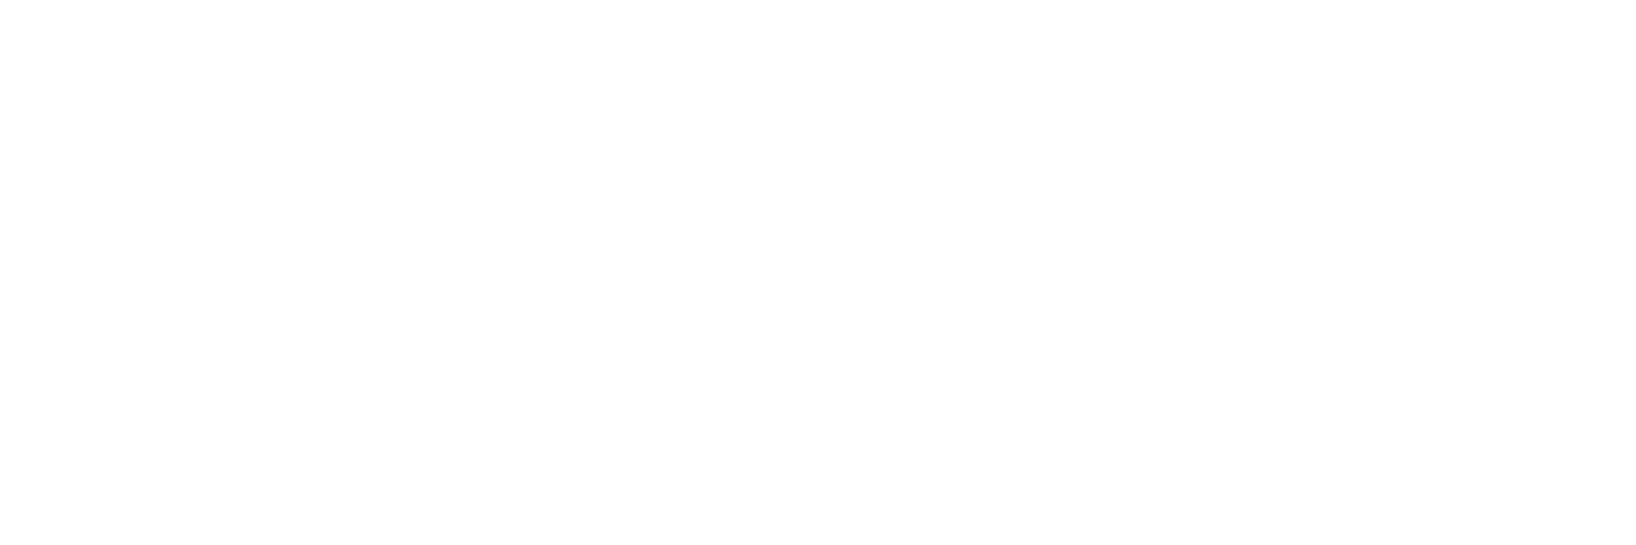

Text(0.5,1,'Cantidad de postulantes por edad y sexo')

In [205]:
%matplotlib notebook
g = sns.heatmap(for_hetmap, linewidths=.5, cmap="YlGnBu",  xticklabels = 2,cbar_kws={"orientation": "horizontal"} )
ax=plt.gca()
ax.set_title('Cantidad de postulantes por edad y sexo',fontsize=30)

In [206]:
postulantes_educacion['het_map'] = 1
for_hetmap2 = postulantes_educacion.pivot_table(index='estado', columns='nivel', values='het_map', aggfunc='sum')
for_hetmap

edad,0,12,18,19,20,21,22,23,24,25,...,69,70,71,72,74,75,76,77,79,97
sexo,,,,,,,,,,,,,,,,,,,,,
FEM,304.0,NaN,352.0,2210.0,3741.0,4937.0,5775.0,6330.0,6520.0,6704.0,...,1.0,5.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0
MASC,323.0,1.0,229.0,1431.0,2708.0,3556.0,4153.0,4551.0,5021.0,4994.0,...,10.0,4.0,4.0,2.0,3.0,2.0,2.0,1.0,1.0,NaN


<IPython.core.display.Javascript object>


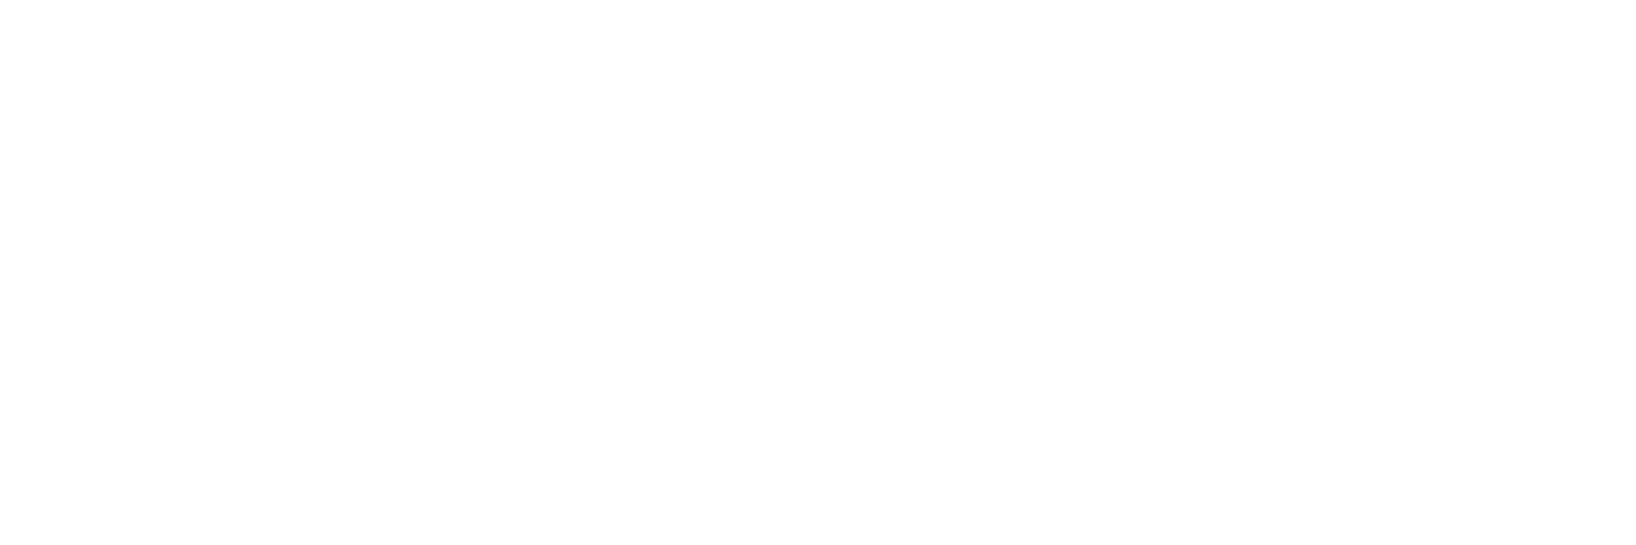

Text(0.5,1,'Cantidad de postulantes por estudio y estado del mismo')

In [207]:
%matplotlib notebook
g = sns.heatmap(for_hetmap2, linewidths=.5, cmap="YlGnBu")
ax=plt.gca()
ax.set_title('Cantidad de postulantes por estudio y estado del mismo',fontsize=30)

In [208]:
avisos_detalle['nombre_zona'].value_counts()

Gran Buenos Aires              12654
Capital Federal                  876
Buenos Aires (fuera de GBA)        2
GBA Oeste                          2
Name: nombre_zona, dtype: int64

<IPython.core.display.Javascript object>


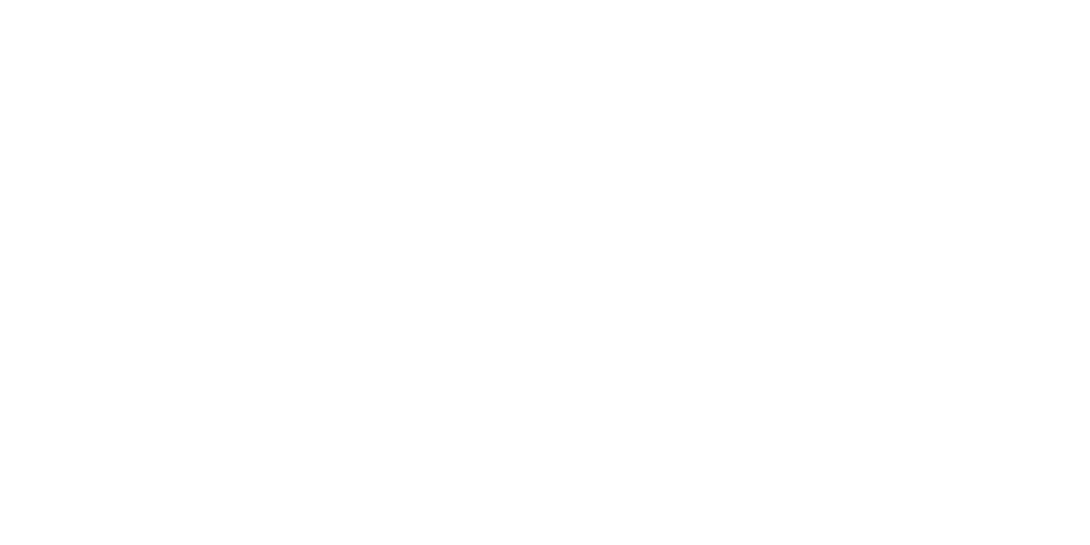

Text(0.5,1,'Cantidad de publicaciones por zona')

In [209]:
%matplotlib notebook
avisos_detalle['nombre_zona'].value_counts().plot(kind='bar',figsize=(10,5),rot=0,fontsize= 8,grid = True);
ax=plt.gca()
ax.set_ylabel('cantidad de publicaciones',fontsize=12);
ax.set_xlabel('zona',fontsize=12)
ax.set_title('Cantidad de publicaciones por zona',fontsize=25)

In [210]:
avisos_detalle['ciudad'].value_counts()

Buenos Aires                14
Argentina                   13
CABA                         3
Capital Federal              2
San Isidro                   2
Vicente Lopez                1
Santa Rosa                   1
República Argentina          1
paternal                     1
Tortuguitas                  1
caba                         1
Barracas                     1
Buenos Aires Province        1
Mendoza                      1
Microcentro                  1
Zárate, Campana, Escobar     1
La Plata                     1
Parque Patricios             1
Name: ciudad, dtype: int64

<IPython.core.display.Javascript object>


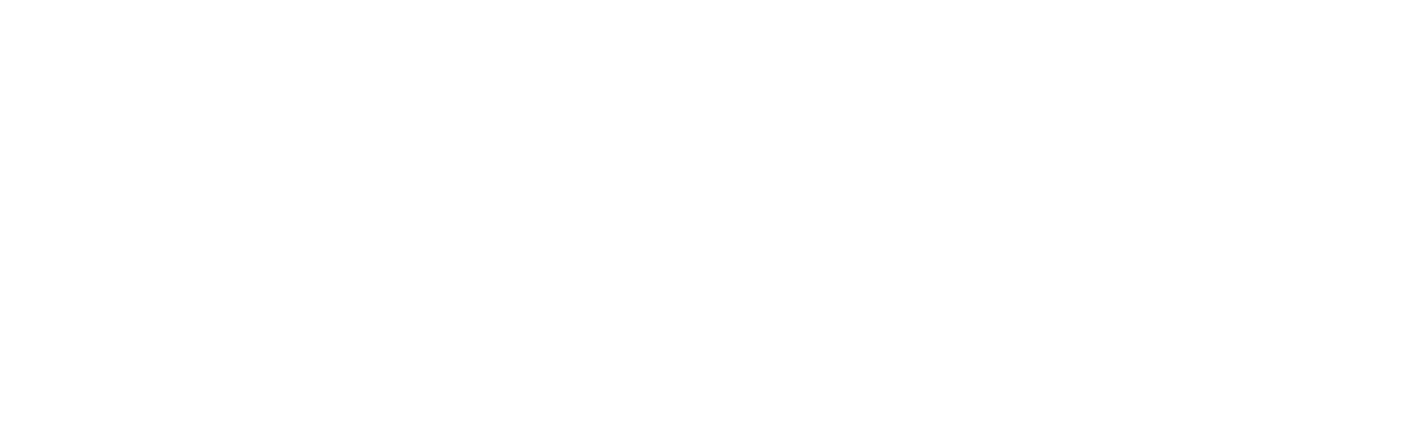

Text(0.5,1,'Cantidad de publicaciones por ciudad')

In [211]:
%matplotlib notebook
avisos_detalle['ciudad'].value_counts().plot(kind='barh',figsize=(13,4),rot=0,fontsize= 8,grid = True);
ax=plt.gca()
ax.set_title('Cantidad de publicaciones por ciudad',fontsize=25)

In [212]:
avisos_detalle['tipo_de_trabajo'].value_counts()

Full-time          12339
Part-time            863
Teletrabajo          110
Pasantia              63
Por Horas             63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: tipo_de_trabajo, dtype: int64

<IPython.core.display.Javascript object>


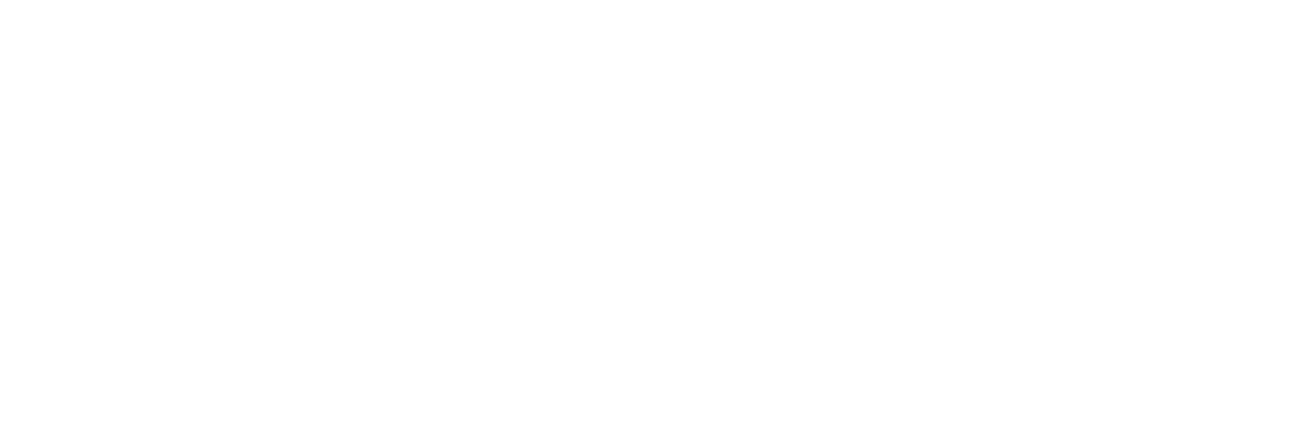

Text(0.5,1,'Cantidad de publicaciones por tipo de trabajo')

In [213]:
%matplotlib notebook
avisos_detalle['tipo_de_trabajo'].value_counts().plot(kind='barh',figsize=(10,4),rot=0,fontsize= 8,grid = True);
ax=plt.gca()
ax.set_title('Cantidad de publicaciones por tipo de trabajo',fontsize=25)

In [214]:
avisos_detalle['nivel_laboral'].value_counts()

Senior / Semi-Senior                    9407
Junior                                  2216
Otro                                     921
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64

In [215]:
avisos_detalle['nivel_laboral'].value_counts().plot(kind='barh',figsize=(12,4),rot=0,fontsize= 8,grid = True);
ax=plt.gca()
ax.set_title('Cantidad de publicaciones por nivel de trabajo',fontsize=25)

Text(0.5,1,'Cantidad de publicaciones por nivel de trabajo')

In [216]:
avisos_detalle['nombre_area'].value_counts()

Ventas                                   1659
Comercial                                 983
Administración                            901
Producción                                821
Programación                              576
Contabilidad                              416
Tecnologia / Sistemas                     388
Atención al Cliente                       347
Mantenimiento                             324
Recursos Humanos                          235
Gastronomia                               234
Oficios y Profesiones                     209
Soporte Técnico                           203
Logística                                 200
Call Center                               191
Almacén / Depósito / Expedición           184
Compras                                   170
Marketing                                 153
Otros                                     153
Administración de Personal                152
Recepcionista                             151
Transporte                        

<IPython.core.display.Javascript object>


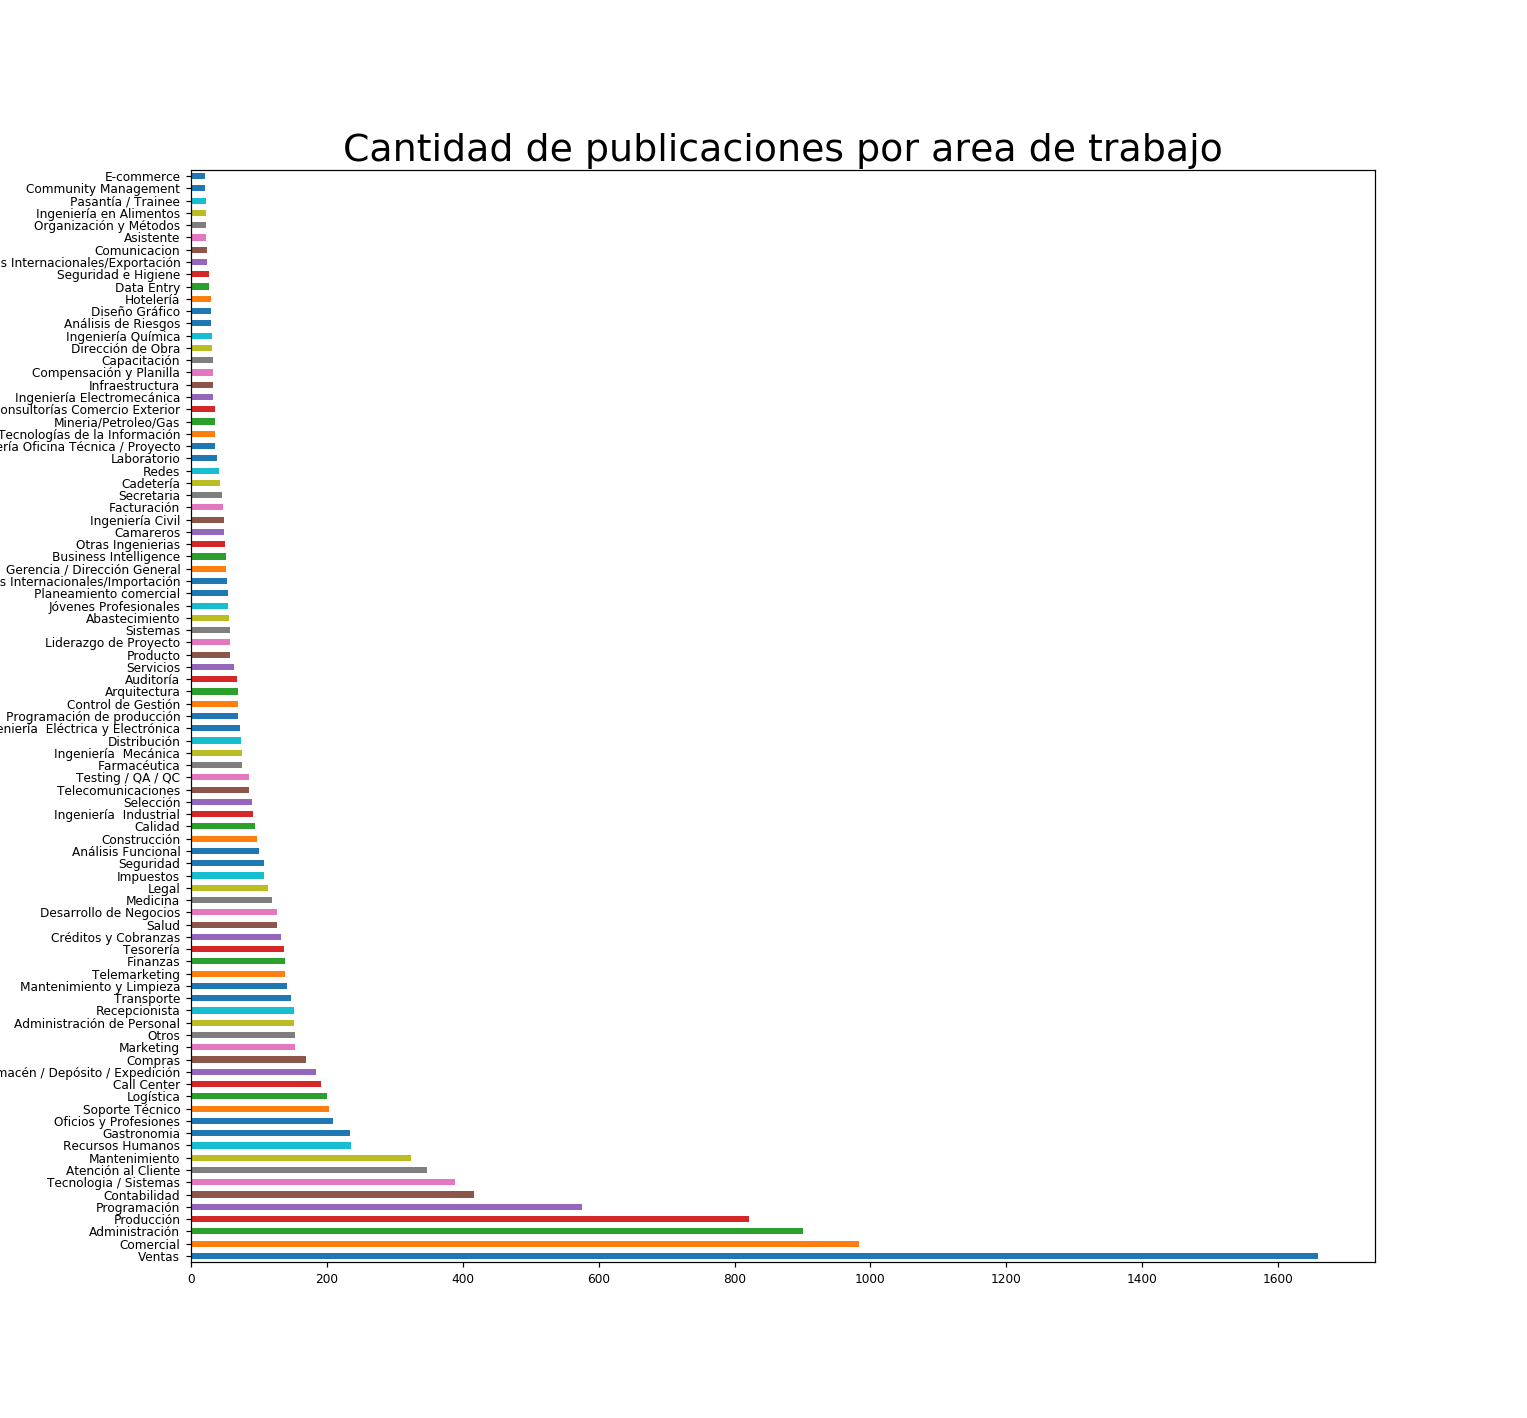

Text(0.5,1,'Cantidad de publicaciones por area de trabajo')

In [217]:
%matplotlib notebook
#saco los valores menores a 20 por que afectan en la visu
porAreas = avisos_detalle.groupby('nombre_area')['idaviso'].describe()
porAreas.sort_values('count', inplace=True, ascending=False)
porAreas = porAreas[porAreas['count']>20]
porAreas['count'].plot(kind='barh',figsize=(14,13),rot=0,fontsize= 8,grid = False);
ax=plt.gca()
ax.set_title('Cantidad de publicaciones por area de trabajo',fontsize=25)